In [1]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

import yfinance as yf

# Load stock info

In [2]:
# Download stock info
# stock_info = yf.download("^HSI", start="2000-01-01", end="2003-06-15")
# stock_info = yf.download("AAPL", start="2000-01-01", end="2003-06-15")
# stock_info = yf.download("AAPL", start="2000-01-01", end="2021-08-16")
stock_info = yf.download("NVDA", start="2021-01-01", end="2021-08-16")
stock_info

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,131.365005,131.509995,129.149994,130.550003,130.475052,19242400
2021-01-04,131.042496,136.524994,129.625000,131.134995,131.059723,56064000
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.970551,32276000
2021-01-06,132.225006,132.449997,125.860001,126.144997,126.072578,58042400
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.363388,46148000
...,...,...,...,...,...,...
2021-08-09,204.460007,205.080002,201.429993,202.949997,202.949997,14644300
2021-08-10,203.220001,204.300003,198.350006,199.360001,199.360001,17923800
2021-08-11,200.429993,200.490005,194.300003,196.990005,196.990005,18592500


In [3]:
# Load the stock close data
stock_close_data = pd.DataFrame(stock_info["Close"])
stock_close_data

,Close
Date,
2020-12-31,130.550003
2021-01-04,131.134995
2021-01-05,134.047501
2021-01-06,126.144997
2021-01-07,133.440002
...,...
2021-08-09,202.949997
2021-08-10,199.360001
2021-08-11,196.990005


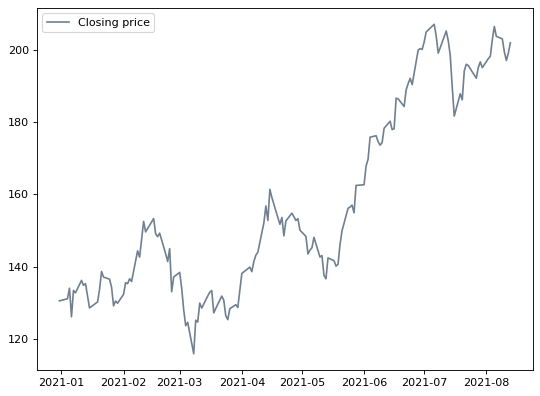

In [4]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.legend()
plt.show()

# Find Trend

In [5]:
X = np.array(stock_close_data.reset_index().index).reshape(-1, 1)
Y = stock_close_data["Close"]
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
stock_trend = pd.DataFrame(Y_pred, columns=["Data"])
stock_trend.index = stock_close_data.index

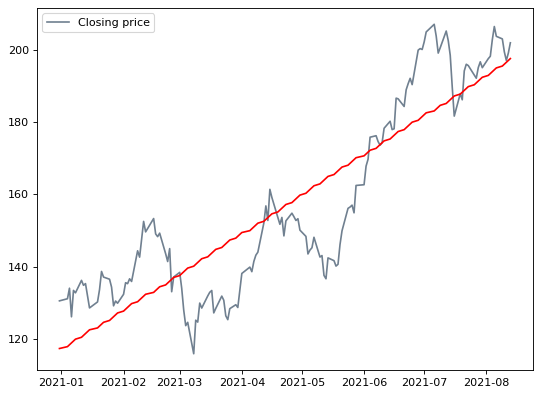

In [6]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(stock_trend, color='red')
plt.legend()
plt.show()

In [7]:
# Slope of best-fit line
linear_regressor.coef_

array([0.51697533])

In [8]:
if linear_regressor.coef_ < 0:
    print("Downtrend")
else:
    print("Uptrend")

Uptrend
